In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
import seaborn as sns


In [30]:
'''
Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
Age -- quantitative -- Day (1~365) -- Input Variable
Concrete compressive strength -- quantitative -- MPa -- Output Variable

'''

df = pd.read_excel('Concrete_Data.xls')

# read_excel 하는디...
# ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

# df.head()
# df.describe()

# df.columns
df.rename(columns = {
    'Cement (component 1)(kg in a m^3 mixture)' : 'cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : 'blast',
       'Fly Ash (component 3)(kg in a m^3 mixture)' : 'fly',
       'Water  (component 4)(kg in a m^3 mixture)' : 'water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)' : 'super',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' : 'coarse',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)' : 'fine',
       'Age (day)' : 'age',
       'Concrete compressive strength(MPa, megapascals) ' : 'strength'
}, inplace=True)

df.head()

X = df.drop(['strength'], axis=1)
# X.head()

Y = df['strength']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X.shape # (1030, 8)

# Y

(1030, 8)

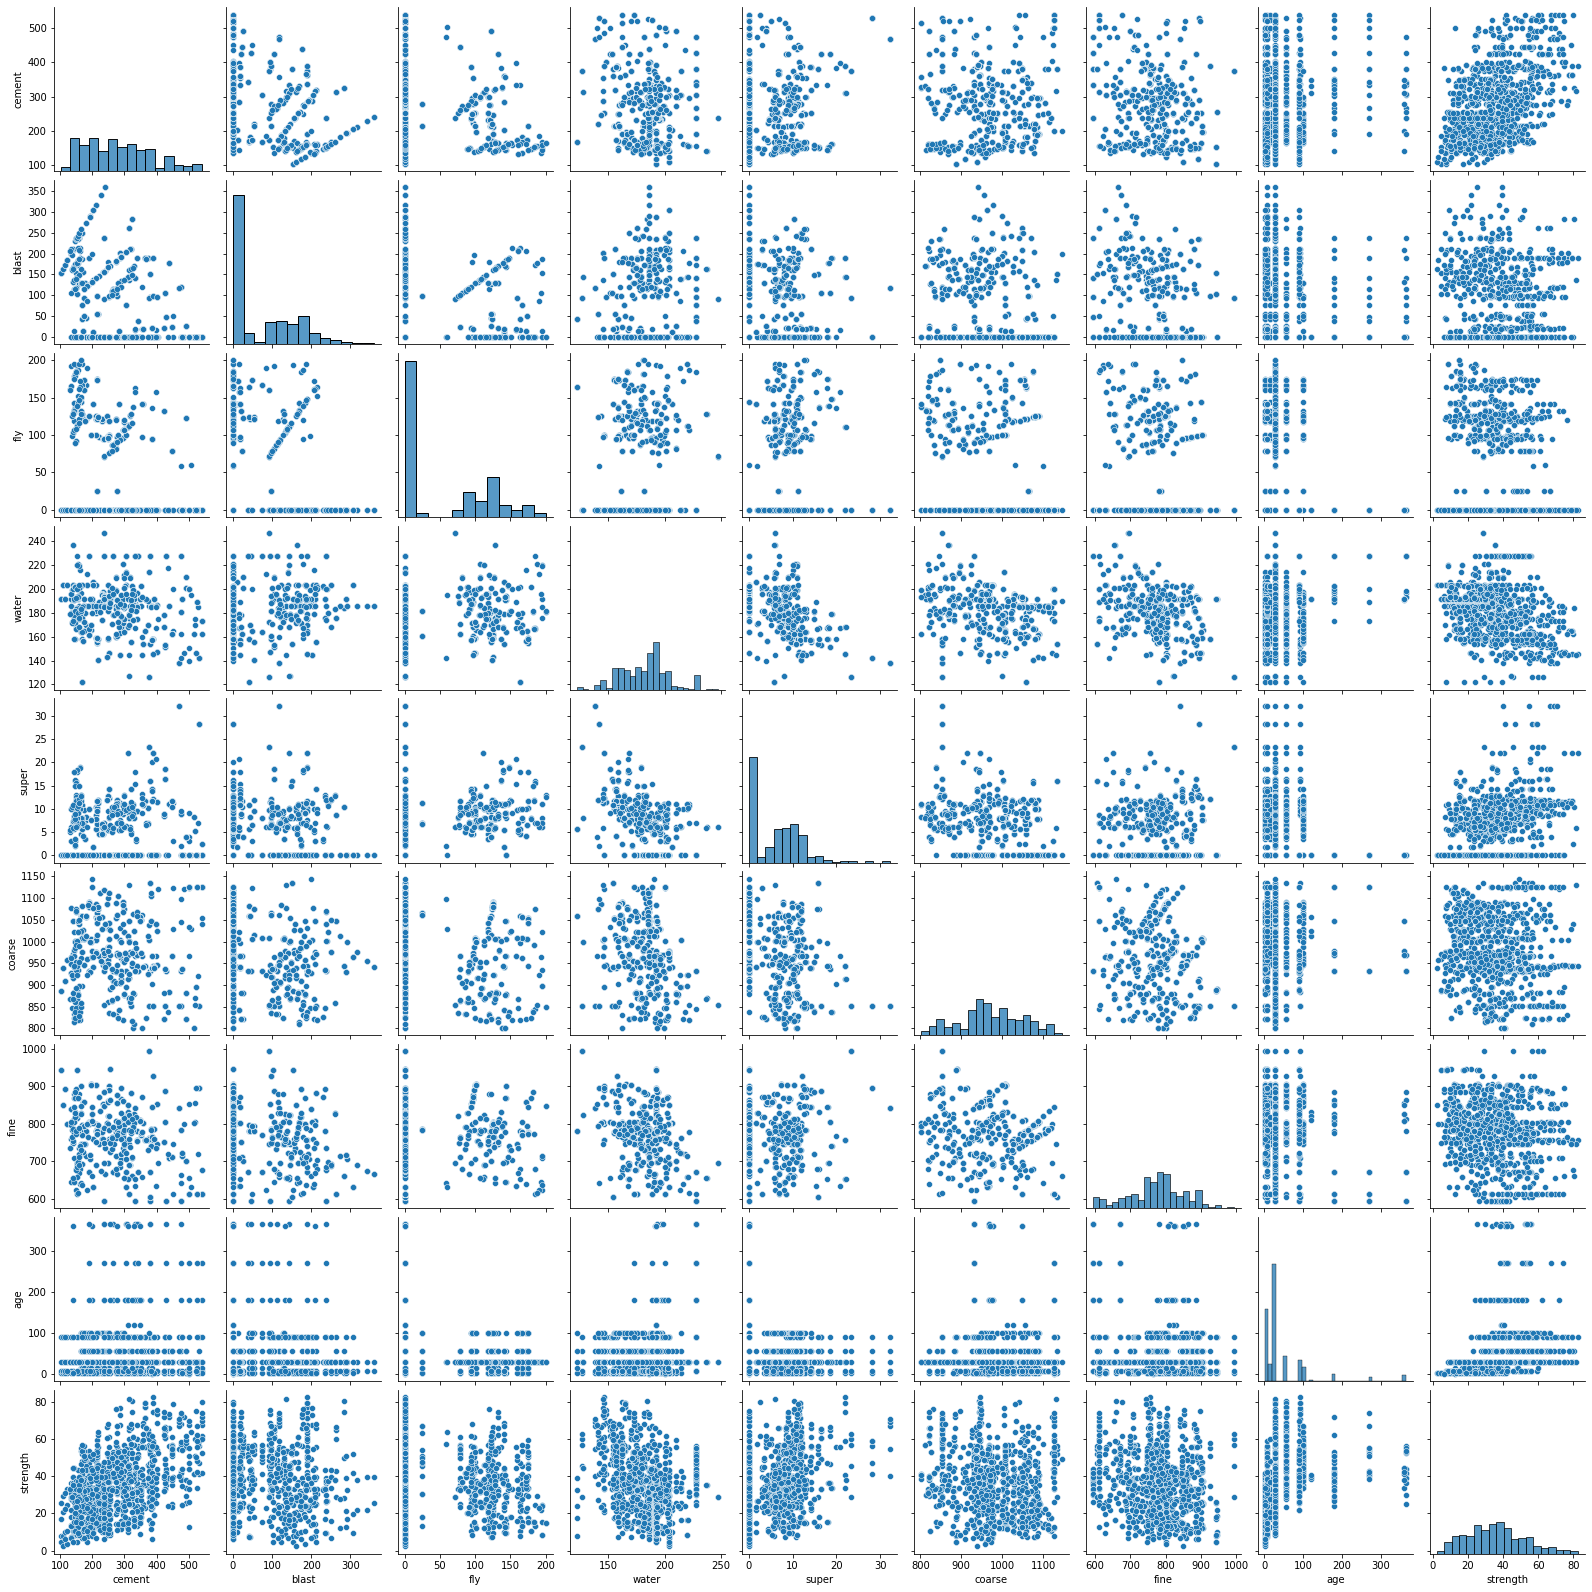

In [31]:
sns.pairplot(df)

In [32]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(8,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               2304      
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 39,361
Trainable params: 39,361
Non-trainable params: 0
_________________________________________________________________


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
X_train.shape # (927, 8)

(927, 8)

In [34]:
hist = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100


/home/supreme/.local/lib/python3.8/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


27/27 [==============================] - 1s 8ms/step - loss: 1386.3265 - val_loss: 1076.8749
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 491.6021 - val_loss: 302.0284
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 224.6083 - val_loss: 223.2668
Epoch 4/100
27/27 [==============================] - 0s 4ms/step - loss: 176.2100 - val_loss: 195.9997
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 148.1267 - val_loss: 177.2676
Epoch 6/100
27/27 [==============================] - 0s 4ms/step - loss: 131.6872 - val_loss: 169.2897
Epoch 7/100
27/27 [==============================] - 0s 4ms/step - loss: 123.9283 - val_loss: 167.1168
Epoch 8/100
27/27 [==============================] - 0s 4ms/step - loss: 115.9826 - val_loss: 165.7288
Epoch 9/100
27/27 [==============================] - 0s 4ms/step - loss: 113.4777 - val_loss: 162.6188
Epoch 10/100
27/27 [==============================] - 0s 4ms/step - loss: 111.4234 

27/27 [==============================] - 0s 4ms/step - loss: 34.4284 - val_loss: 58.6994
Epoch 82/100
27/27 [==============================] - 0s 3ms/step - loss: 33.4396 - val_loss: 55.4440
Epoch 83/100
27/27 [==============================] - 0s 3ms/step - loss: 33.1049 - val_loss: 55.3499
Epoch 84/100
27/27 [==============================] - 0s 4ms/step - loss: 33.1537 - val_loss: 56.7946
Epoch 85/100
27/27 [==============================] - 0s 4ms/step - loss: 36.2197 - val_loss: 56.1660
Epoch 86/100
27/27 [==============================] - 0s 4ms/step - loss: 32.7956 - val_loss: 58.0970
Epoch 87/100
27/27 [==============================] - 0s 4ms/step - loss: 34.6242 - val_loss: 56.8714
Epoch 88/100
27/27 [==============================] - 0s 4ms/step - loss: 33.4271 - val_loss: 57.5391
Epoch 89/100
27/27 [==============================] - 0s 4ms/step - loss: 33.3996 - val_loss: 56.7553
Epoch 90/100
27/27 [==============================] - 0s 4ms/step - loss: 34.6106 - val_loss: 5

In [35]:
score = model.evaluate(X_test, y_test)
# print(score) # 38.86266326904297

pred = model.predict(X_test[-5:])
print(pred)
print(y_test[-5:])



1/1 [==============================] - 0s 62ms/step
[[18.902182]
 [50.68666 ]
 [50.915035]
 [40.51842 ]
 [19.742634]]
891    13.458572
402    53.579180
2      40.269535
79     41.299612
886    17.953955
Name: strength, dtype: float64


/tmp/ipykernel_3310/1859810740.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_test[-5:])


Text(0.5, 1.0, 'loss')

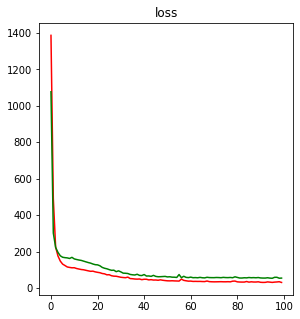

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='g')
plt.title('loss')